In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Indivudual

In [21]:
"""
Individual class for genetic algorithms.
"""
from typing import List, Optional
import random
from abc import ABC, abstractmethod
from typing import Callable

class Individual(ABC):
    """
    Represents an individual in a genetic algorithm.
    
    Attributes:
        genotype: List representing the individual's genotype
        fitness_value: Fitness value of the individual
    """
    
    def __init__(self, genotype: Optional[List] = None, calculate_fitness: Optional[Callable] = None):
        """
        Constructor for the individual.
        
        Args:
            genotype: Initial genotype of the individual. If None, it's generated randomly.
            random_size: Size of the random genotype to generate if genotype is None.
        """
        if genotype is not None:
            self.genotype = genotype
        else:
            self.genotype = []
        
        self.fitness = calculate_fitness
        self.fitness_value: float = 0.0
        self.calculate_fitness()

    # @abstractmethod
    def calculate_fitness(self):
        self.fitness_value = self.fitness(self.genotype)
    
    def get_fitness(self) -> float:
        """Returns the fitness value of the individual."""
        return self.fitness_value
    
    def get_genotype(self) -> List:
        """Returns the genotype of the individual."""
        return self.genotype    
    
    def __repr__(self) -> str:
        """String representation of the individual."""
        return f"Individuo(fitness={self.fitness_value:.4f}, genotype={self.genotype}, )"
    
    def __str__(self) -> str:
        """Human-readable string of the individual."""
        return f"Individual with fitness: {self.fitness_value:.4f}"


# Evo

In [ ]:
"""
Evo class for evolutionary genetic algorithms.
"""
from typing import List, Callable, Optional
import random
# from .individual import Individual


class Evo:
    """
    Class that implements a generic evolutionary algorithm.
    
    Attributes:
        population: List of individuals in the population
        best_indiv: Best individual found
        crossover_function: Crossover function to use
    """
    
    def __init__(
        self,
        population: Optional[List[Individual]] = None,
        crossover_function: Optional[Callable] = None,
        minimize : bool = True,
    ):
        """
        Constructor for the Evo class.
        
        Args:
            population: Initial population of individuals. If None, it's generated randomly.
            crossover_function: Custom crossover function.
            population_size: Size of the population to generate if population is None.
            genotype_size: Size of the genotype for random individuals.
        """
        if population is not None:
            self.individuals = population
        else:
            self.individuals = []
        self.individuals_size = len(self.individuals)
        self.minimize = minimize
        
        self.calculate_best_individual()
    
    def calculate_best_individual(self) -> Optional[Individual]:
        """
        Calculates best individual in the population.
        
        Returns:
            Best individual in the population
        """
        if self.minimize:
            best_indiv = min(self.individuals, key=lambda ind: ind.fitness_value)
        else:
            best_indiv = max(self.individuals, key=lambda ind: ind.fitness_value)
        self.best_indiv = best_indiv

    def get_best_individual(self) -> Optional[Individual]:
        """
        Returns the best individual in the population.
        
        Returns:
            Best individual in the population
        """
        return self.best_indiv


    def _default_crossover(self, parent1: Individual, parent2: Individual) -> tuple[Individual, Individual]:
        """
        Default crossover function (single-point crossover).
        
        Args:
            parent1: First parent
            parent2: Second parent
            
        Returns:
            Tuple with two offspring resulting from the crossover
        """
        if len(parent1.genotype) == 0 or len(parent2.genotype) == 0:
            return parent1, parent2
        
        crossover_point = random.randint(1, len(parent1.genotype) - 1)
        
        offspring1_genotype = parent1.genotype[:crossover_point] + parent2.genotype[crossover_point:]
        offspring2_genotype = parent2.genotype[:crossover_point] + parent1.genotype[crossover_point:]
        
        offspring1 = Individual(genotype=offspring1_genotype)
        offspring2 = Individual(genotype=offspring2_genotype)
        
        return offspring1, offspring2
    
    def crossover(self, parent1: Individual, parent2: Individual) -> tuple[Individual, Individual]:
        """
        Performs crossover between two parent individuals.
        
        Args:
            parent1: First parent
            parent2: Second parent
            
        Returns:
            Tuple with two offspring resulting from the crossover
        """
        return self.crossover_function(parent1, parent2)
    
    def mutation(self, individual: Individual, mutation_rate: float = 0.1, mutation_strength: float = 0.1) -> Individual:
        """
        Applies mutation to an individual.
        
        Args:
            individual: Individual to mutate
            mutation_rate: Probability of mutation for each gene
            mutation_strength: Magnitude of the mutation
            
        Returns:
            Mutated individual
        """
        mutated_genotype = []
        
        for gene in individual.genotype:
            if random.random() < mutation_rate:
                # Apply mutation
                if isinstance(gene, (int, float)):
                    gene = gene + random.gauss(0, mutation_strength)
                else:
                    # If not numeric, keep the original gene
                    pass
            mutated_genotype.append(gene)
        
        mutated_individual = Individual(genotype=mutated_genotype)
        return mutated_individual
    
    def update_best_individual(self) -> None:
        """
        Updates the best individual in the population based on fitness.
        """
        if not self.individuals:
            self.best_indiv = None
            return
        
        self.best_indiv = max(self.individuals, key=lambda ind: ind.fitness_value)
    
    def __repr__(self) -> str:
        """String representation of the Evo class."""
        return f"Evo(population_size={len(self.individuals)}, best_fitness={self.best_indiv.fitness_value if self.best_indiv else 'N/A'}"


# Refactor: Population

In [ ]:
class Population():
    def __init__(self, population: Optional[list] = None, quality_function: Optional[Callable] = None, get_min: bool = True):
        self.individuals = population if population is not None else []
        self.quality_function = quality_function if quality_function is not None else min
        self.get_min = get_min
        self.qualities = self.calculate_qualities()
        self.index_best_indiv = self.calculate_index_best_individual()

    def calculate_qualities(self) -> Optional[Individual]:
        """
        Calculates quality of each individual in the population.
        """
        qualities = [self.quality_function(ind) for ind in self.individuals]
        # self.qualities = qualities
        return qualities
    
    def calculate_index_best_individual(self) -> Optional[Individual]:
        """
        Calculates best individual in the population.
        
        Returns:
            Index of the best individual in the population
        """
        if self.get_min:
            index_best = self.qualities.index(min(self.qualities))
        else:  
            index_best = self.qualities.index(max(self.qualities))
        return index_best
    
    def get_best_individual(self) -> Optional[Individual]:
        """
        Returns the best individual in the population.
        
        Returns:
            Best individual in the population
        """
        return self.individuals[self.index_best_indiv]
    
    def get_best_quality(self) -> Optional[float]:
        """
        Returns the quality of the best individual in the population.
        
        Returns:
            Quality of the best individual in the population
        """
        return self.qualities[self.index_best_indiv]

# TSP start

In [6]:
cities = [[0.8744058793117488, 0.30207179832703746], [0.6901572276474558, 0.8203362566663311], [0.7793458478083026, 0.09728979746351918], [0.7483358474304422, 0.4563419482458657], [0.4556164527790729, 0.12863149772605698], [0.1837236688553453, 0.23773749495644914], [0.806151832654163, 0.3288366900529254], [0.6222702185205219, 0.6019431085670109], [0.21886861543988367, 0.6980104036528004], [0.9706096813038716, 0.054871876245520146], [0.13881496219356027, 0.048489530185603646], [0.08511086492841424, 0.9123075505436051], [0.45436952164297595, 0.4731540740573398], [0.8986352255038935, 0.5116579750591849], [0.9539248970461742, 0.7530784036308166], [0.6321102985156373, 0.13575967095580344], [0.31130918313591205, 0.8545457319320597], [0.025897479791937017, 0.7854526665590987], [0.31414095045738066, 0.051421702103483846], [0.2739561013272712, 0.1970964027924862], [0.22762328443470214, 0.627414210742153], [0.44920042912037383, 0.18835427573438068], [0.2793138301174244, 0.9103956650199608], [0.005128451667189338, 0.4655718085045638], [0.9222718335261915, 0.8613103704784812], [0.49352498279326595, 0.28652416807644077], [0.5560886356057152, 0.034564925228364185], [0.0048939219846825255, 0.8635350555457212], [0.7824462381771976, 0.09355415747424733], [0.2973635133076785, 0.037580527218207815], [0.659068210692151, 0.5602321147981546], [0.43549418718677035, 0.6241289474799954], [0.25580657871099755, 0.519726015381631], [0.5950780852425872, 0.3193476592023645], [0.15763623266223903, 0.18210618406479095], [0.3434173147566393, 0.32992255868483356], [0.06451313705472006, 0.12606114349173192], [0.23212286400737547, 0.3945559700824013], [0.955507285594692, 0.02296933408938162], [0.7459955912073274, 0.1385374827130177], [0.46365765315595475, 0.6132297411379687], [0.20196772698059162, 0.046358747430397584], [0.2980093518214506, 0.36041197123227897], [0.7533459401199348, 0.6610562232191091], [0.323433933838161, 0.5068337090138902], [0.062138830138457, 0.7177455044259695], [0.47467832142010535, 0.17692718986260936], [0.2415634321550142, 0.500852093941769], [0.3441878827094532, 0.2604351258948506], [0.5445252142594251, 0.7295590645635646], [0.25391391610860914, 0.7641244059389684], [0.2630560480211699, 0.010670642241309536], [0.2092202940037915, 0.7415775443241935], [0.0031474687633804566, 0.6974574785842637], [0.4952329615559806, 0.9311775894780175], [0.1978488658972426, 0.8872693649066419], [0.1705364411799497, 0.8846808176103278], [0.7634962513234275, 0.4358457309207533], [0.9259752834140167, 0.0056226911773098465], [0.22090405091557253, 0.14500040130773872], [0.4636205151855679, 0.19249574424477278], [0.8057632881682811, 0.250168118157608], [0.6785236695642043, 0.39119477830554505], [0.4837264739606879, 0.23045417711558214], [0.8786721718893166, 0.015853186240832207], [0.1263309724872509, 0.9185321014517236], [0.24969404380600335, 0.9600467657522086], [0.5886119367943214, 0.10948123668473264], [0.13373527735293878, 0.5336853876899833], [0.5642696742735989, 0.9801384844337597], [0.646401605512568, 0.3338636388089157], [0.05603526365085032, 0.3149530712641142], [0.387141492676661, 0.5792852545912592], [0.8634070619751958, 0.8206820685065667], [0.4662474858565825, 0.32647667516764145], [0.01801973379815025, 0.12175434785651695], [0.6218125565554127, 0.07860046445444713], [0.6573938922925594, 0.5023092428939168], [0.2837581848186974, 0.02576704782244421], [0.3044774374252185, 0.7310313422019327], [0.33131673439274434, 0.693896434962478], [0.8523694048117944, 0.2805224723356823], [0.6200019812032047, 0.03989814578273998], [0.5437394088109648, 0.3258031129949792], [0.4386079860370994, 0.6142798815693052], [0.7430581106897977, 0.49260737229959284], [0.3913628378102181, 0.3185830750836698], [0.9065498976196814, 0.02381958527497441], [0.6874236611131453, 0.18642068590773597], [0.6946411585627993, 0.36991609629423117], [0.3784063098306413, 0.01018756575849844], [0.43806374889930155, 0.2268325586117821], [0.7411632641820634, 0.35513151640087337], [0.3884706603234591, 0.34043302784114093], [0.08674110453583683, 0.4491174987265194], [0.9794883193315694, 0.11207520940235804], [0.7496156619797683, 0.23845386610980834], [0.4423888847621813, 0.17212722421686055], [0.2276570035864689, 0.6515924491551327], [0.836939257954547, 0.0499933914625984]] # Length=8.587

def dist (x, y): # distancia euclídea
	return ( (x[0]-y[0])**2 + (x[1]-y[1])**2 ) ** 0.5

def globaldist (cities): # calcula la ditancia global de una solución
	acum = 0.0
	for i in range(len(cities)):
		acum += dist(cities[i-1],cities[i]) # -1 is the last element
	return acum

def fit_cities (cities): # fitness para TSP
	return 1 / (1+globaldist(cities))

def draw (solution):
    plt.ion()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    xlim = axes.set_xlim(0.0,1.0)
    ylim = axes.set_ylim(0.0,1.0)
    x = []
    y = []

    bucle = solution + [solution[0]] # añade al final la vuelta a la primera

    c = np.array(bucle)
    x = c[:,0]
    y = c[:,1]

    l1, = axes.plot(x, y,'g')
    l2, = axes.plot(x, y,'ro')
    
    s = 'Length=%5.3f' % globaldist(bucle)
    plt.title(s)


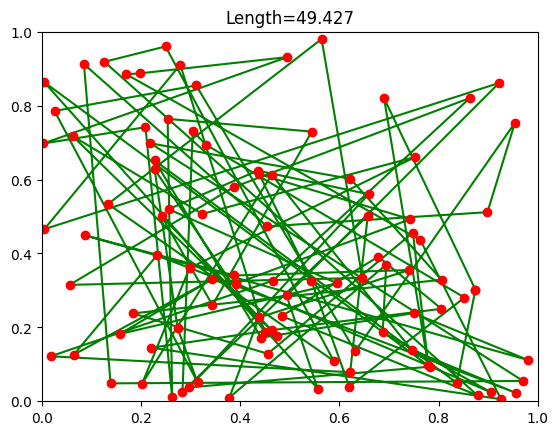

In [6]:
draw(cities)

In [18]:
N_poblacion = 100

In [67]:
init_population = []
population_no_indiv = []
for i in range(N_poblacion):
    shuffled_cities = cities.copy()
    random.shuffle(shuffled_cities)
    population_no_indiv.append(shuffled_cities)
    individual = Individual(genotype=shuffled_cities, calculate_fitness=globaldist)
    init_population.append(individual)

In [68]:
evo = Evo(population=init_population)

In [69]:
init_population

[Individuo(fitness=54.4491, genotype=[[0.8057632881682811, 0.250168118157608], [0.2630560480211699, 0.010670642241309536], [0.8744058793117488, 0.30207179832703746], [0.6321102985156373, 0.13575967095580344], [0.31130918313591205, 0.8545457319320597], [0.24969404380600335, 0.9600467657522086], [0.387141492676661, 0.5792852545912592], [0.4386079860370994, 0.6142798815693052], [0.25580657871099755, 0.519726015381631], [0.5560886356057152, 0.034564925228364185], [0.7533459401199348, 0.6610562232191091], [0.31414095045738066, 0.051421702103483846], [0.646401605512568, 0.3338636388089157], [0.836939257954547, 0.0499933914625984], [0.1837236688553453, 0.23773749495644914], [0.2980093518214506, 0.36041197123227897], [0.6946411585627993, 0.36991609629423117], [0.6218125565554127, 0.07860046445444713], [0.25391391610860914, 0.7641244059389684], [0.8986352255038935, 0.5116579750591849], [0.4837264739606879, 0.23045417711558214], [0.6785236695642043, 0.39119477830554505], [0.23212286400737547, 0.

In [70]:
evo.best_indiv

Individuo(fitness=44.0610, genotype=[[0.4423888847621813, 0.17212722421686055], [0.01801973379815025, 0.12175434785651695], [0.2973635133076785, 0.037580527218207815], [0.3434173147566393, 0.32992255868483356], [0.31414095045738066, 0.051421702103483846], [0.9222718335261915, 0.8613103704784812], [0.062138830138457, 0.7177455044259695], [0.3884706603234591, 0.34043302784114093], [0.08511086492841424, 0.9123075505436051], [0.3044774374252185, 0.7310313422019327], [0.22090405091557253, 0.14500040130773872], [0.13881496219356027, 0.048489530185603646], [0.4837264739606879, 0.23045417711558214], [0.5886119367943214, 0.10948123668473264], [0.005128451667189338, 0.4655718085045638], [0.1263309724872509, 0.9185321014517236], [0.5445252142594251, 0.7295590645635646], [0.836939257954547, 0.0499933914625984], [0.9259752834140167, 0.0056226911773098465], [0.6874236611131453, 0.18642068590773597], [0.806151832654163, 0.3288366900529254], [0.31130918313591205, 0.8545457319320597], [0.33131673439274

In [95]:
pop = Population(population=population_no_indiv, quality_function=globaldist)

In [86]:
pop.population

[[[0.8057632881682811, 0.250168118157608],
  [0.2630560480211699, 0.010670642241309536],
  [0.8744058793117488, 0.30207179832703746],
  [0.6321102985156373, 0.13575967095580344],
  [0.31130918313591205, 0.8545457319320597],
  [0.24969404380600335, 0.9600467657522086],
  [0.387141492676661, 0.5792852545912592],
  [0.4386079860370994, 0.6142798815693052],
  [0.25580657871099755, 0.519726015381631],
  [0.5560886356057152, 0.034564925228364185],
  [0.7533459401199348, 0.6610562232191091],
  [0.31414095045738066, 0.051421702103483846],
  [0.646401605512568, 0.3338636388089157],
  [0.836939257954547, 0.0499933914625984],
  [0.1837236688553453, 0.23773749495644914],
  [0.2980093518214506, 0.36041197123227897],
  [0.6946411585627993, 0.36991609629423117],
  [0.6218125565554127, 0.07860046445444713],
  [0.25391391610860914, 0.7641244059389684],
  [0.8986352255038935, 0.5116579750591849],
  [0.4837264739606879, 0.23045417711558214],
  [0.6785236695642043, 0.39119477830554505],
  [0.2321228640073

In [87]:
pop.qualities

[54.44912554177986,
 47.840986312047605,
 53.07162500680144,
 50.782130947593636,
 51.87415557736697,
 57.15311467406301,
 51.69835978832823,
 47.995216445713424,
 49.971250933434966,
 52.171673392288795,
 53.427049288518425,
 52.59407805412808,
 50.43082716258933,
 49.755001837098156,
 47.31032869985658,
 51.45896824589039,
 49.38523129138369,
 51.166731655648505,
 49.357432820652924,
 49.93333417517576,
 52.461579270421296,
 51.41090421529158,
 49.07847672011728,
 52.3103168205833,
 48.51882831784987,
 49.09212823453694,
 51.235158525947924,
 50.2647765764683,
 47.44446023565345,
 50.80065099620151,
 54.04753140141307,
 50.588078239470654,
 49.64852629086891,
 52.33678537534674,
 49.69299568878302,
 48.88927703762779,
 51.004776778103455,
 50.61771038823033,
 51.577975002492785,
 52.91003258523579,
 44.060971183757566,
 50.3394752175355,
 48.208641076463145,
 51.2542196219452,
 53.63929771697609,
 50.09957221048583,
 53.906816579292155,
 52.8948204555562,
 48.10553757123939,
 52.6479

In [89]:
pop.index_best_indiv

40

In [96]:
pop.get_best_quality()

44.060971183757566

In [16]:
indi = Individual(genotype=cities, calculate_fitness=globaldist)

In [17]:
indi.get_fitness()

49.426862073522464

In [ ]:
def get_max(lista):
    return 
    

# Democracia    

In [1]:
"""
Individual class for genetic algorithms.
"""
from typing import List, Optional


class Individual:
    """
    Represents an individual in a genetic algorithm.
    
    Attributes:
        genotype: List representing the individual's genotype
        fitness_value: Fitness value of the individual
    """
    
    def __init__(self, genotype: Optional[List] = None):
        """
        Constructor for the individual.
        
        Args:
            genotype: Initial genotype of the individual. If None, it's generated randomly.
            random_size: Size of the random genotype to generate if genotype is None.
        """
        if genotype is not None:
            self.genotype = genotype
        else:
            self.genotype = []
        
        self.fitness_value: float = 0.0
    
    def __repr__(self) -> str:
        """String representation of the individual."""
        return f"Individuo(genotype={self.genotype}, fitness={self.fitness_value:.4f})"
    
    def __str__(self) -> str:
        """Human-readable string of the individual."""
        return f"Individual with fitness: {self.fitness_value:.4f}"


In [31]:
"""
Population class for genetic algorithms.
"""
from typing import Callable, List, Optional
# from .individual import Individual


class Population():
    """
    Represents a population of individuals in a genetic algorithm.
    Inherits from list to hold Individual objects.
    
    Attributes:
        best_individual: The individual with the highest fitness in the population.
    """

    def __init__(self, individuals: List[Individual] = None, quality_function: Optional[Callable] = None, get_min = True):
        """
        Constructor for the Population class.

        Args:
            individuals: A list of Individual objects to initialize the population.
                         If None, an empty population is created.
        """
        self.quality_function = quality_function
        self.counter_quality = 0
        self.individuals = individuals
        self.get_min = get_min
        self.update_all_qualities()

    def update_all_qualities(self):
        [self.update_quality(i) for i in self.individuals]


    def update_quality(self, individual) -> None:
        """
        Calculates the firnss pf and individual
        """

        individual.fitness_value = self.quality_function(individual.genotype)
        self.counter_quality += 1


    def _update_best_individual(self) -> None:
        """
        Updates the best individual in the population based on fitness.
        This method should be called whenever the population or individual fitnesses change.
        """
        if self.get_min:
            self.best_individual = min(self.individuals, key=lambda ind: ind.fitness_value)
        else:
            self.best_individual = min(self.individuals, key=lambda ind: ind.fitness_value)

    def append(self, individual: Individual) -> None:
        """
        Appends an individual to the population and updates the best individual.

        Args:
            individual: The Individual object to append.
        """
        super().append(individual)
        self._update_best_individual()

    def extend(self, individuals: List[Individual]) -> None:
        """
        Extends the population with a list of individuals and updates the best individual.

        Args:
            individuals: A list of Individual objects to extend the population with.
        """
        super().extend(individuals)
        self._update_best_individual()

    def __setitem__(self, key, value):
        """
        Sets an item in the population and updates the best individual.
        """
        super().__setitem__(key, value)
        self._update_best_individual()

    def __delitem__(self, key):
        """
        Deletes an item from the population and updates the best individual.
        """
        pass


In [32]:
N_poblacion = 100

In [33]:
init_population = []
for i in range(N_poblacion):
    shuffled_cities = cities.copy()
    random.shuffle(shuffled_cities)
    individual = Individual(genotype=shuffled_cities)
    init_population.append(individual)

In [34]:
pop = Population(init_population, quality_function=globaldist)

In [36]:
pop.counter_quality

100

In [35]:
pop.individuals

[Individuo(genotype=[[0.323433933838161, 0.5068337090138902], [0.08511086492841424, 0.9123075505436051], [0.22762328443470214, 0.627414210742153], [0.9706096813038716, 0.054871876245520146], [0.44920042912037383, 0.18835427573438068], [0.7411632641820634, 0.35513151640087337], [0.646401605512568, 0.3338636388089157], [0.062138830138457, 0.7177455044259695], [0.9259752834140167, 0.0056226911773098465], [0.4952329615559806, 0.9311775894780175], [0.33131673439274434, 0.693896434962478], [0.387141492676661, 0.5792852545912592], [0.45436952164297595, 0.4731540740573398], [0.2793138301174244, 0.9103956650199608], [0.6218125565554127, 0.07860046445444713], [0.6573938922925594, 0.5023092428939168], [0.1705364411799497, 0.8846808176103278], [0.5445252142594251, 0.7295590645635646], [0.005128451667189338, 0.4655718085045638], [0.3441878827094532, 0.2604351258948506], [0.46365765315595475, 0.6132297411379687], [0.43549418718677035, 0.6241289474799954], [0.6874236611131453, 0.18642068590773597], [